In [1]:
%run -m celldom.nb.logging

In [2]:
import os
import os.path as osp
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pandas as pd
from celldom.core import cytometry
from celldom.config import experiment_config
from celldom.dataset import marker_dataset
import celldom

In [3]:
config = experiment_config.ExperimentConfig(celldom.get_config('experiment', 'experiment_example_01'))

In [4]:
config.field_names

['cohort', 'chip', 'z', 'concentration', 'street', 'datetime', 'apartment']

In [5]:
config.path_regex

'.*(?P<datetime>[0-9.]{15}) MOLM13 (?P<cohort>NoDrug|1nMQuiz) (?P<concentration>[1I]Mperml) (?P<chip>Chip2)/BF_ST_(?P<street>[0-9]{3})_APT_(?P<apartment>[0-9]{3})_(?P<z>z[_mp][0-9]{1}).tif'

In [6]:
config.parse_path('2018.05.31.1610 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_zm3.tif')

{'apartment': '000',
 'chip': 'Chip2',
 'cohort': 'NoDrug',
 'concentration': '1Mperml',
 'datetime': Timestamp('2018-05-31 16:10:00'),
 'street': '000',
 'z': 'zm3'}

In [7]:
import imp
imp.reload(cytometry)

<module 'celldom.core.cytometry' from '/lab/repos/celldom/python/source/celldom/core/cytometry.py'>

In [8]:
cytometer = cytometry.Cytometer(config, '/tmp/test')

In [9]:
cytometer.initialize()

Using TensorFlow backend.


In [10]:
#exp_dir = '2018.05.31.1610 MOLM13 NoDrug 1Mperml Chip2'
exp_dir = '2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2'
path = osp.join(celldom.get_data_dir(), 'dataset', 'dataset03', exp_dir)
path

'/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2'

In [11]:
!find "$path" | sort | head -n 20

/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_z_0.tif
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_zm3.tif
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_zm6.tif
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_zm9.tif
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_zp3.tif
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_zp6.tif
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_zp9.tif
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_002_z_0.tif
/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperm

In [12]:
#img_path = osp.join(path, 'BF_ST_000_APT_000_z_0.tif')
#img_path = osp.join(path, 'BF_ST_000_APT_000_zp3.tif')
img_path = osp.join(path, 'BF_ST_000_APT_004_z_0.tif')
img_path

'/lab/data/celldom/dataset/dataset03/2018.06.04.1820 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_004_z_0.tif'

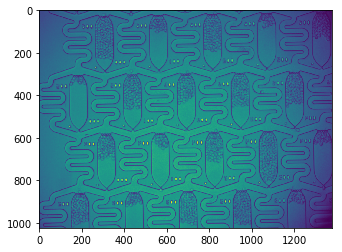

In [13]:
plt.imshow(io.imread(img_path))

In [14]:
acq = cytometry.Acquisition(config, img_path)

In [15]:
img = acq.load_image()

In [16]:
img.shape

(1024, 1376, 3)

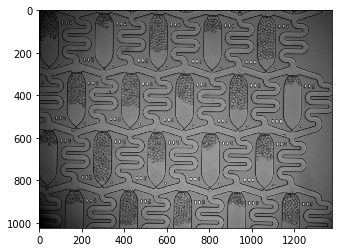

In [17]:
plt.imshow(img)

In [18]:
%pdb OFF
acq_data, apt_data, cell_data = cytometer.analyze(acq)

Automatic pdb calling has been turned OFF


/usr/local/lib/python3.5/dist-packages/skimage/morphology/misc.py:207: UserWarning: the min_size argument is deprecated and will be removed in 0.16. Use area_threshold instead.
  "0.16. Use area_threshold instead.")
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_15_1537292143.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_15_1537292143.png | Occupancy: 0.15039584685269305
File: /lab/data/celldom/cellmasks/binary_mask_61_1537292143.png | Occupancy: 0.6136794289422453


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_61_1537292143.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_23_1537292143.png | Occupancy: 0.23283582089552238


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_23_1537292143.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_74_1537292144.png | Occupancy: 0.7354185593770279


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_74_1537292144.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_52_1537292144.png | Occupancy: 0.5241271901362752


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_52_1537292144.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_55_1537292145.png | Occupancy: 0.5536664503569111


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_55_1537292145.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_43_1537292145.png | Occupancy: 0.43249837767683325


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_43_1537292145.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_58_1537292145.png | Occupancy: 0.5757819597663855
File: /lab/data/celldom/cellmasks/binary_mask_8_1537292145.png | Occupancy: 0.08051914341336794


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_58_1537292145.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_8_1537292145.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_84_1537292146.png | Occupancy: 0.8374821544451655
File: /lab/data/celldom/cellmasks/binary_mask_17_1537292146.png | Occupancy: 0.16856586632057105


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_84_1537292146.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_17_1537292146.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_47_1537292146.png | Occupancy: 0.46899415963659963


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_47_1537292146.png is a low contrast image
  warn('%s is a low contrast image' % fname)


File: /lab/data/celldom/cellmasks/binary_mask_40_1537292146.png | Occupancy: 0.40015574302401036


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:140: UserWarning: /lab/data/celldom/cellmasks/binary_mask_40_1537292146.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [31]:
cytometer.save(acq_data, apt_data, cell_data)

In [24]:
cytometer.datastore.store.flush()

In [20]:
acq_data

,acq_apartment,acq_chip,acq_cohort,acq_concentration,acq_datetime,acq_id,acq_processed_at,acq_street,acq_z,apt_count,raw_image_path,raw_image_shape_height,raw_image_shape_width,raw_norm_image,rotation
0,004,Chip2,NoDrug,1Mperml,2018-06-04 18:20:00,ded6e5c741a7bdc6b70dbe4cad4f7c35,2018-09-18 17:33:47,000,z_0,13,/lab/data/celldom/dataset/dataset03/2018.06.04...,1024,1376,None,0.68071


In [21]:
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
acq_apartment             1 non-null object
acq_chip                  1 non-null object
acq_cohort                1 non-null object
acq_concentration         1 non-null object
acq_datetime              1 non-null datetime64[ns]
acq_id                    1 non-null object
acq_processed_at          1 non-null datetime64[ns]
acq_street                1 non-null object
acq_z                     1 non-null object
apt_count                 1 non-null int64
raw_image_path            1 non-null object
raw_image_shape_height    1 non-null int64
raw_image_shape_width     1 non-null int64
raw_norm_image            0 non-null object
rotation                  1 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(9)
memory usage: 200.0+ bytes


In [19]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 42 columns):
acq_apartment             13 non-null object
acq_chip                  13 non-null object
acq_cohort                13 non-null object
acq_concentration         13 non-null object
acq_datetime              13 non-null datetime64[ns]
acq_id                    13 non-null object
acq_processed_at          13 non-null datetime64[ns]
acq_street                13 non-null object
acq_z                     13 non-null object
apt_id                    13 non-null int64
apt_image                 13 non-null object
apt_image_height          13 non-null int64
apt_image_width           13 non-null int64
apt_num                   13 non-null object
apt_num_digit_images      0 non-null object
apt_num_digit_scores      13 non-null object
apt_num_image             0 non-null object
cell_area_mean            13 non-null float64
cell_area_p10             13 non-null float64
cell_area_p50             13 

In [20]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 26 columns):
acq_apartment        738 non-null object
acq_chip             738 non-null object
acq_cohort           738 non-null object
acq_concentration    738 non-null object
acq_datetime         738 non-null datetime64[ns]
acq_id               738 non-null object
acq_processed_at     738 non-null datetime64[ns]
acq_street           738 non-null object
acq_z                738 non-null object
apt_id               738 non-null int64
apt_num              738 non-null object
area                 738 non-null int64
cell_id              738 non-null int64
cell_image           0 non-null object
centroid_x           738 non-null float64
centroid_y           738 non-null float64
eccentricity         738 non-null float64
in_chamber           738 non-null bool
in_trap              738 non-null bool
roi_xmax             738 non-null int64
roi_xmin             738 non-null int64
roi_ymax             738 no

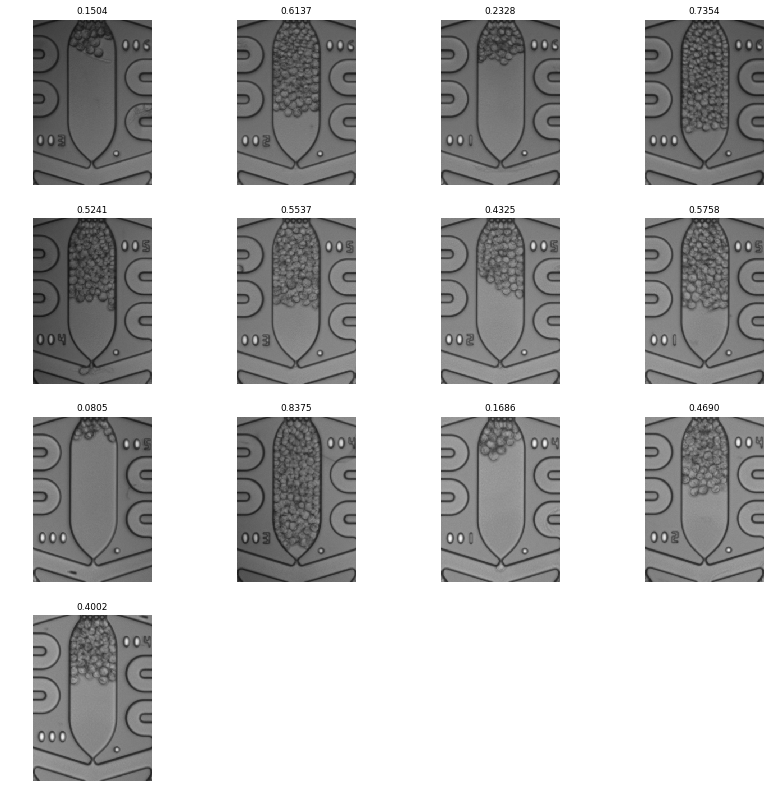

In [21]:
from cvutils.visualize import display_images
display_images(apt_data['apt_image'], titles=['{:.4f}'.format(v) for v in apt_data['occupancy_chamber']])